# NLP Classification CleanWatAI Project
This notebook classifies water safety reports using structured data and natural language processing (NLP) from the "excerpt" field.

---

In [476]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##  **Data Loading and Exploratory Data Analysis (EDA)**
To begin our NLP project, we first loaded the dataset which contains humanitarian assessment reports, each associated with a severity label. Our aim is to predict the severity of humanitarian issues based on the textual content of these reports.

**Key Steps in Data Loading:**
Loaded the dataset using Pandas.

Displayed basic information: column names, data types, and sample records.

Verified the presence of essential columns for NLP and modeling:

excerpt: the main text field describing events.

severity: the target label, with categories like "Unsafe", "Safe" and "Moderate".

Checked for null or missing values in the key columns.
### **Data Loading**

In [477]:
# Importing libraries

import numpy as np
import pandas as pd

In [478]:
# Load the data
df = pd.read_csv('../data/raw/water_sanitation.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/water_sanitation.csv'

### **Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   entry_id                4157 non-null   object 
 1   country                 4157 non-null   object 
 2   source_title            4157 non-null   object 
 3   excerpt                 4157 non-null   object 
 4   geo_location            4157 non-null   float64
 5   water_source            4157 non-null   object 
 6   sanitation_type         4157 non-null   object 
 7   sector                  4157 non-null   object 
 8   gender                  4157 non-null   object 
 9   age_group               4157 non-null   object 
 10  income_level            4157 non-null   object 
 11  infrastructure_type     4157 non-null   object 
 12  population_density      4157 non-null   object 
 13  climate_zone            4157 non-null   object 
 14  year                    4157 non-null   

In [ ]:
df.columns

Index(['entry_id', 'country', 'source_title', 'excerpt', 'geo_location',
       'water_source', 'sanitation_type', 'sector', 'gender', 'age_group',
       'income_level', 'infrastructure_type', 'population_density',
       'climate_zone', 'year', 'organization', 'source_type',
       'special_needs_group', 'severity', 'water_color', 'water_clarity',
       'water_odor', 'recent_rain', 'nearby_activities',
       'nearby_infrastructure', 'vegetation_near_source',
       'waste_disposal_nearby', 'animal_access', 'water_flow_rate'],
      dtype='object')

In [ ]:
df['excerpt'][10]

'Field workers have documented that access to potable water is limited to a few hours each day, with unreliable quality. Local authorities are urged to scale up hygiene education campaigns.'

### **Data Cleaning**

In [ ]:
# Checking for missing/null values
for col in  df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col} : {df[col].isna().sum()}')

population_log : 1003
has_rain : 3000
waste_nearby : 3000
text : 2869
text_clean : 2869


- From the above cell only **'special_needs_group'** column contains 779 missing / null-values

In [ ]:
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
Name: count, dtype: int64

In [ ]:
# Replace missing with 'none' instead of having 'None' which reads as Null-Value
df['special_needs_group'] = df['special_needs_group'].fillna('none')
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
none                779
Name: count, dtype: int64

### Duplicates

In [ ]:
# Checking for duplicated entries
df.duplicated().sum()

np.int64(1157)

In [ ]:
df = df.drop_duplicates()
print(f'Duplicated entries : {df.duplicated().sum()}')

Duplicated entries : 0


In [ ]:
df.to_csv('../data/processed/water_sanitation_clean.csv')

In [ ]:
# Library importation
import seaborn as sns
import matplotlib.pyplot as plt

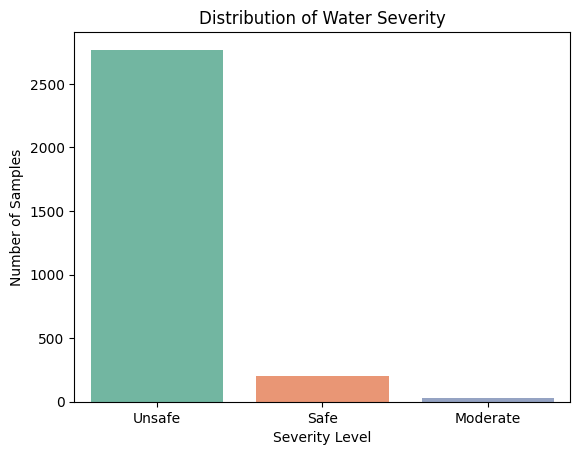

In [ ]:
# Target variable distribution
# Count of each severity class
sns.countplot(data=df, x='severity', hue='severity', palette='Set2', legend=False)
plt.title('Distribution of Water Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Samples')
plt.show()


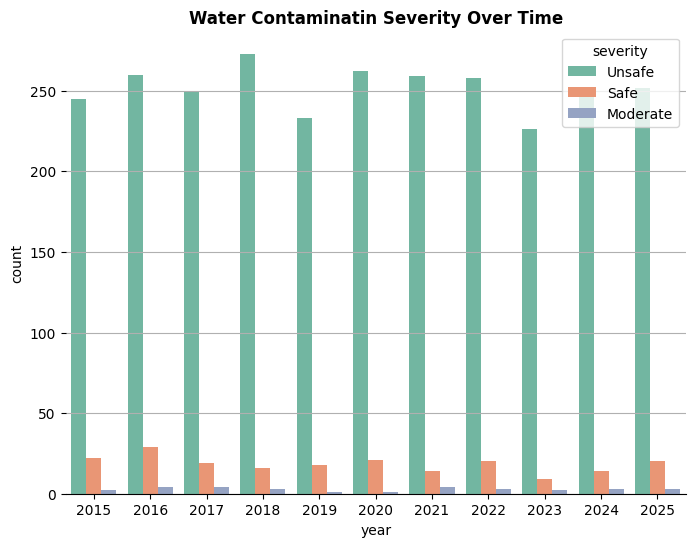

In [ ]:
# Bar Plot showing contamination numbers in years

plt.figure(figsize = (8, 6))

sns.countplot(data = df, x='year', hue='severity', palette='Set2')
plt.title('Water Contaminatin Severity Over Time', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

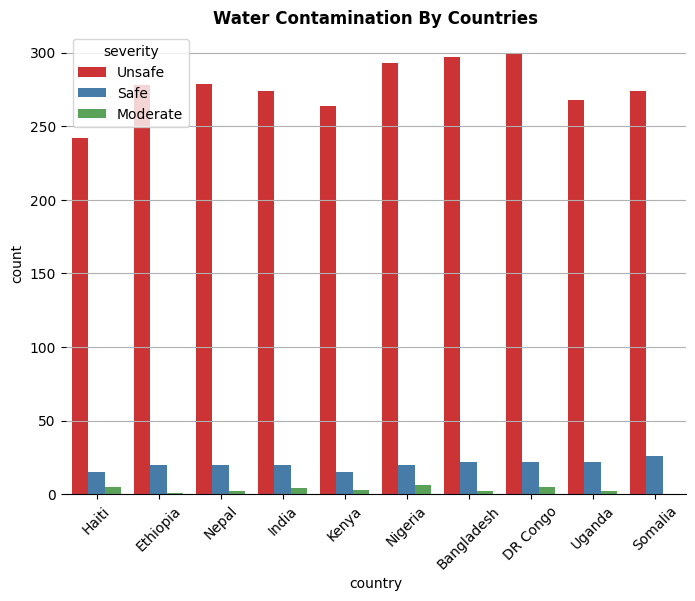

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'country', hue = 'severity', palette = 'Set1')
plt.title('Water Contamination By Countries', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
source_df = pd.crosstab(df['organization'], df['source_type'])
source_df


source_type,Academic Paper,Field Survey,Gov Report,NGO Report
organization,,,,
Red Cross,160,153,140,140
Save the Children,150,167,128,146
UNICEF,150,164,148,136
WHO,140,131,151,167
Water.org,154,169,159,147


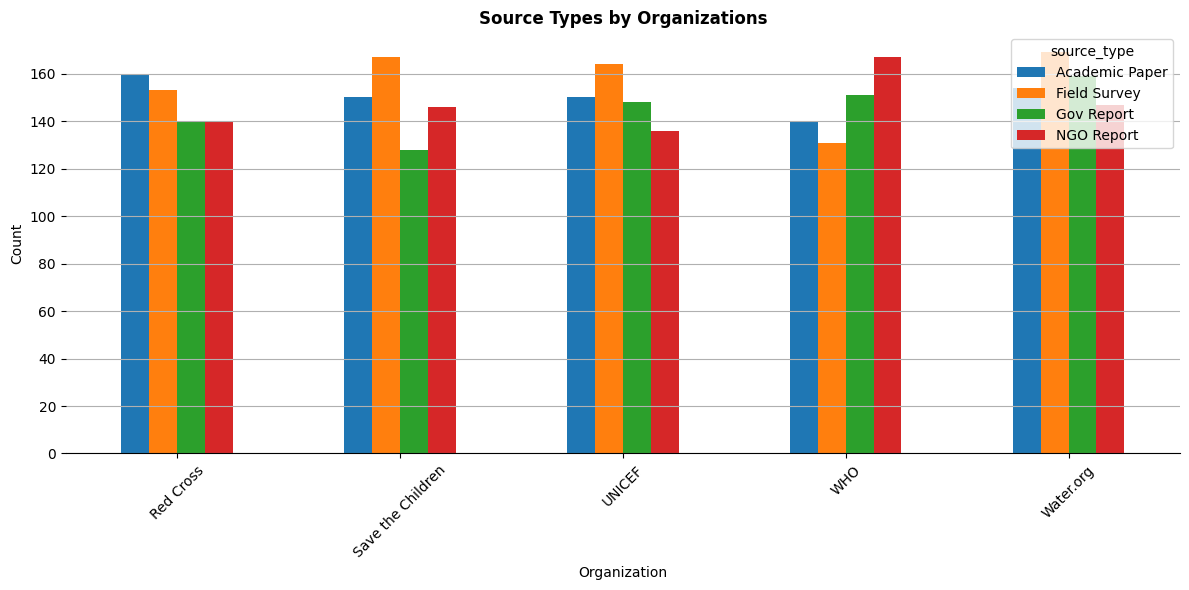

In [ ]:
source_df.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Source Types by Organizations', weight='bold')
plt.xlabel('Organization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()


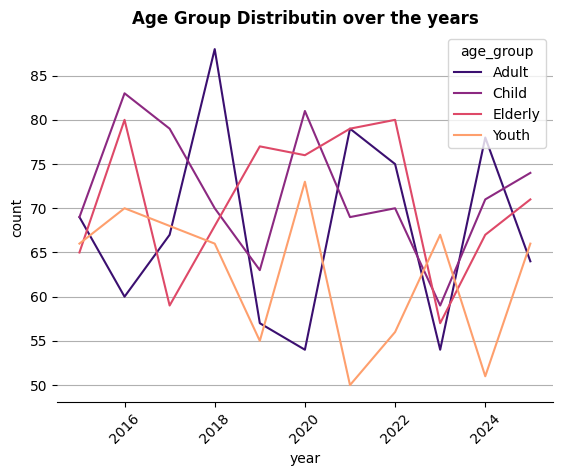

In [ ]:
age_by_year = df.groupby(['year', 'age_group']).size().reset_index(name='count')

sns.lineplot(data=age_by_year, x='year', y='count', hue='age_group', palette='magma')
plt.title('Age Group Distributin over the years', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

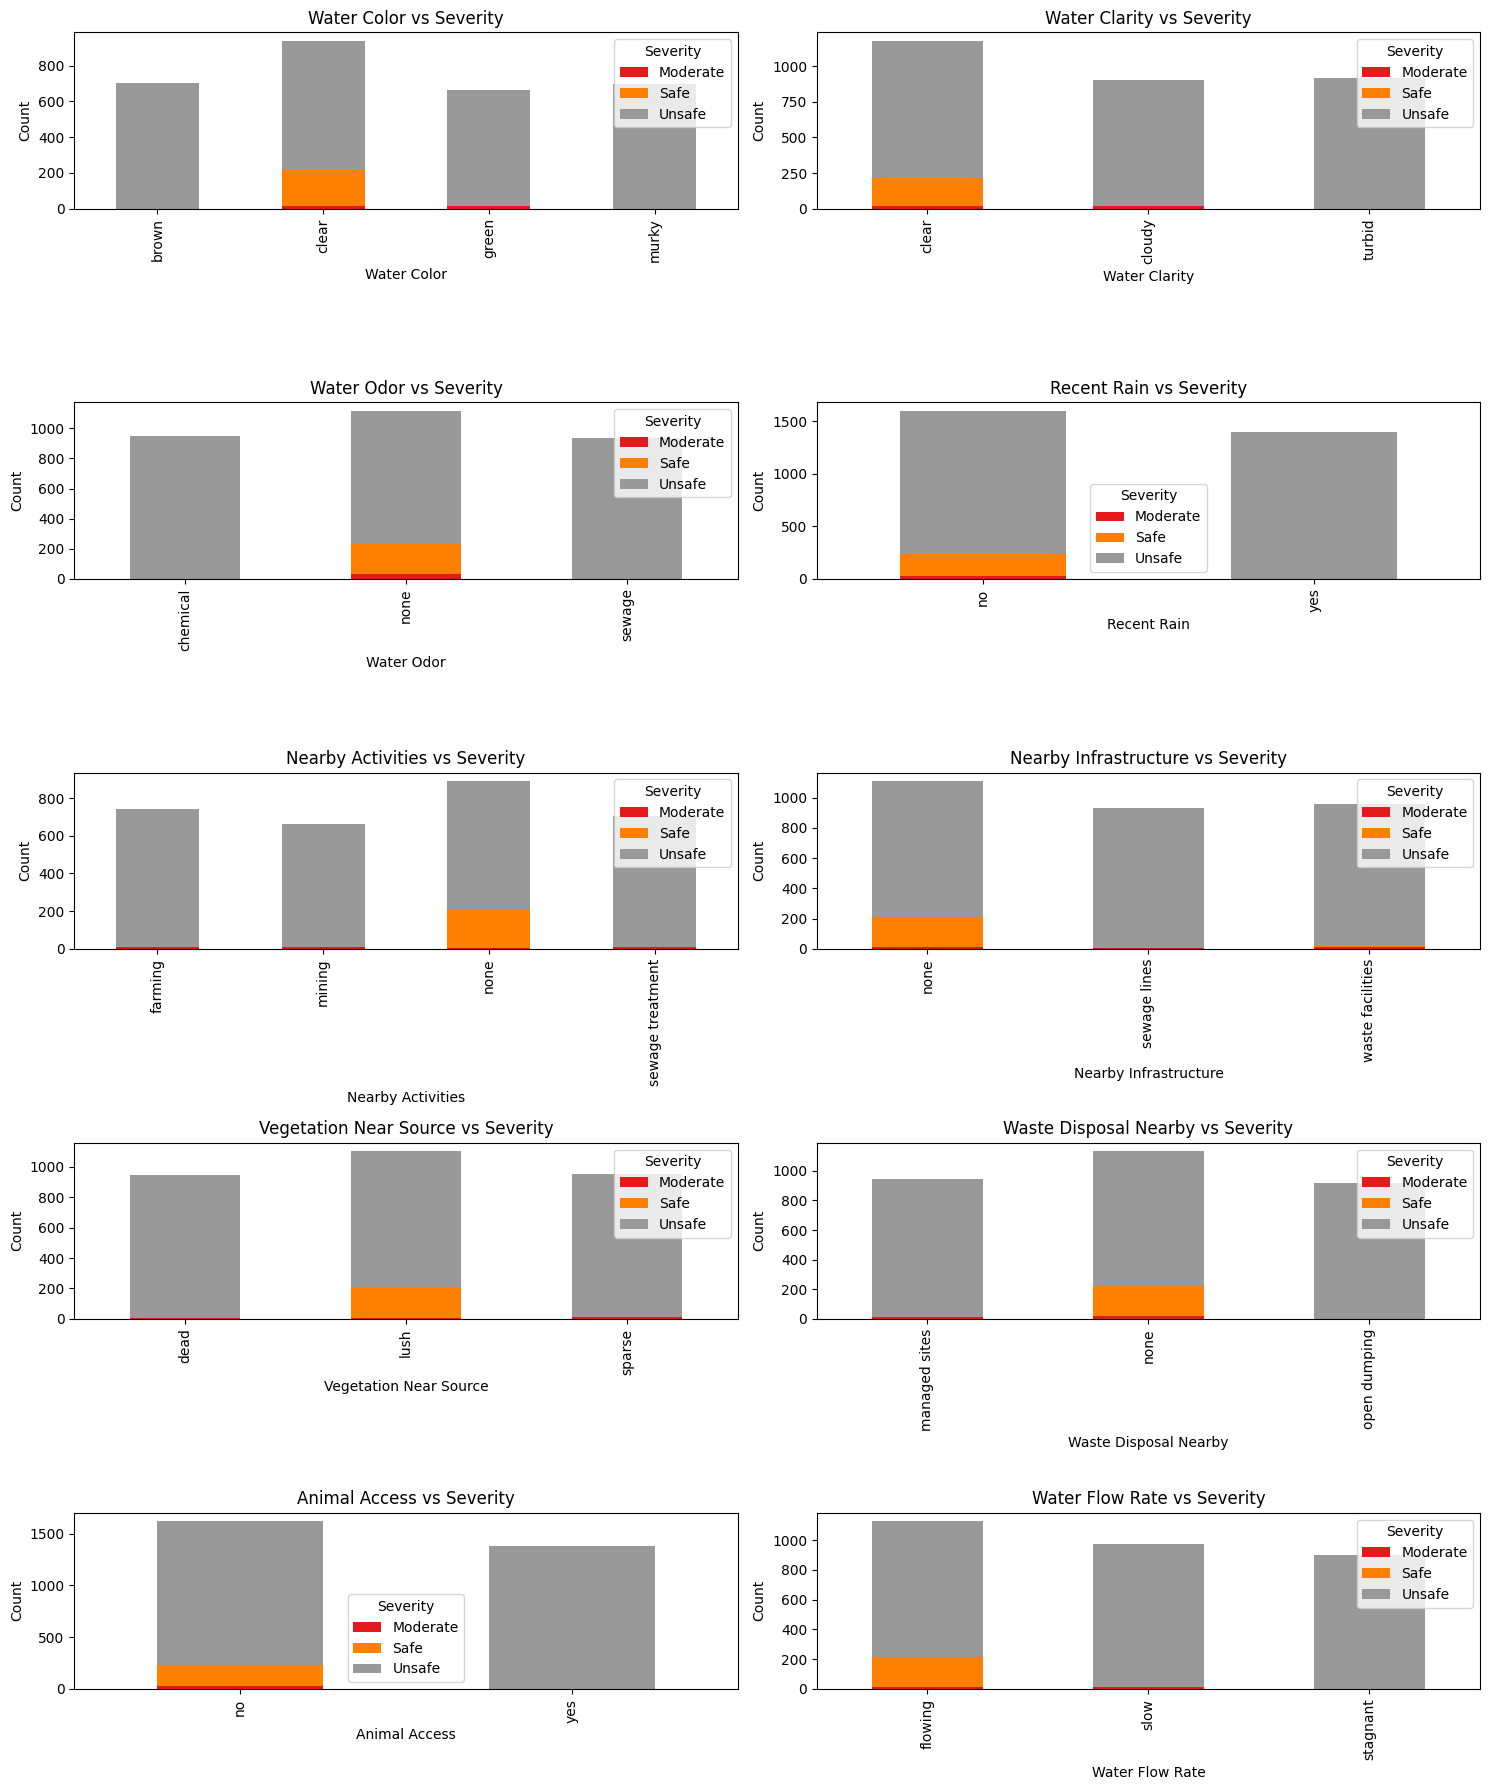

In [ ]:
# Select categorical water quality features
features_to_plot = [
    'water_color', 'water_clarity', 'water_odor', 'recent_rain',
    'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source',
    'waste_disposal_nearby', 'animal_access', 'water_flow_rate'
]

# Set up subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Plot count plots for each feature colored by severity
for i, feature in enumerate(features_to_plot):
    # Group by feature and severity, count occurrences
    df_grouped = df.groupby([feature, 'severity']).size().unstack(fill_value=0)

    # Plot stacked bar chart
    df_grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set1')
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Severity')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Severity')

# Adjust layout
plt.tight_layout()


In [ ]:
df.describe(include='all')

,entry_id,country,source_title,excerpt,geo_location,water_source,sanitation_type,sector,gender,age_group,...,water_color,water_clarity,water_odor,recent_rain,nearby_activities,nearby_infrastructure,vegetation_near_source,waste_disposal_nearby,animal_access,water_flow_rate
count,3000,3000,3000,3000,3000.000000,3000,3000,3000,3000,3000,...,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3000,10,3000,321,NaN,7,4,4,2,4,...,4,3,3,2,4,3,3,3,2,3
top,81a69ab1-6070-4643-ab31-062dabbe355d,DR Congo,Skill may certainly off sing.,"In the most affected zones, untreated sewage h...",NaN,Truck Delivery,Flush Toilet,Health,Female,Child,...,clear,clear,none,no,none,none,lush,none,no,flowing
freq,1,326,1,19,NaN,448,784,779,1508,788,...,940,1180,1117,1601,891,1111,1104,1134,1621,1128
mean,NaN,NaN,NaN,NaN,-0.062769,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,51.554133,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-89.945994,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,-44.162393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,-0.540442,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,44.268546,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Cleaning and Preprocessing**
Handle Missing Values: Drop or fill missing values using mean, mode, or a placeholder (e.g., "Unknown").

Encode Categorical Features: Use Label Encoding or One-Hot Encoding to convert categories to numbers.

Feature Engineering: Create or combine features that may help the model (e.g., weather + activity).

Scaling: Normalize numeric values using StandardScaler or MinMaxScaler.

Text Preprocessing: Clean, tokenize, remove stopwords, and lemmatize if working with text.

Split Data: Divide into training, validation, and test sets (e.g., 70/15/15).

In [ ]:
print(df.shape)

(3000, 37)


In [ ]:
# Finding any NaN values
df.isna().any()

entry_id                   False
country                    False
source_title               False
excerpt                    False
geo_location               False
water_source               False
sanitation_type            False
sector                     False
gender                     False
age_group                  False
income_level               False
infrastructure_type        False
population_density         False
climate_zone               False
year                       False
organization               False
source_type                False
special_needs_group        False
severity                   False
water_color                False
water_clarity              False
water_odor                 False
recent_rain                False
nearby_activities          False
nearby_infrastructure      False
vegetation_near_source     False
waste_disposal_nearby      False
animal_access              False
water_flow_rate            False
excerpt_clean              False
excerpt_to

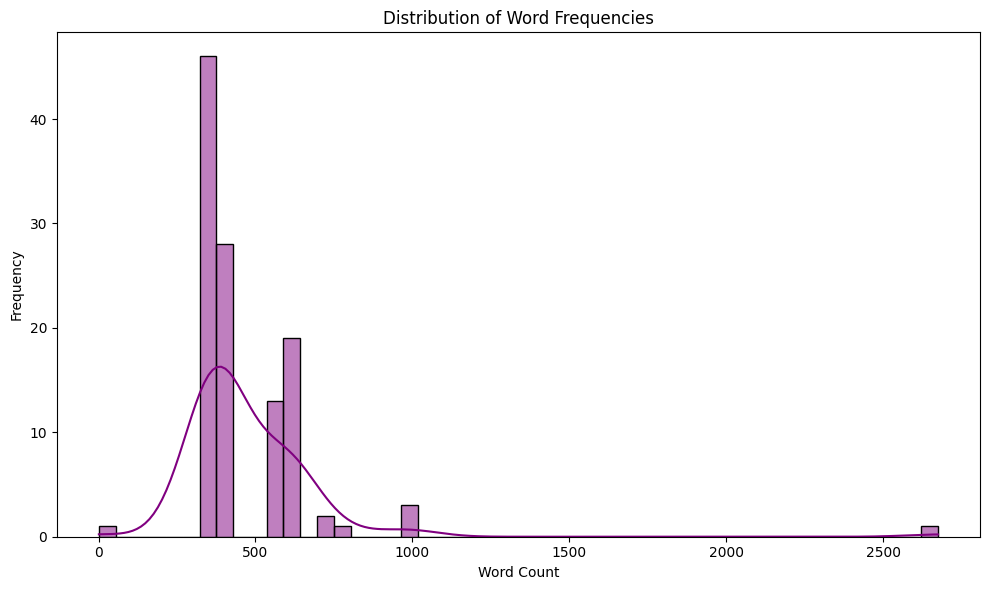

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Extract text data
text_data = df['excerpt'].dropna().astype(str)

# Convert to word frequencies
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

# Word frequencies
word_freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({'word': words, 'count': word_freq})

# Sort values
freq_df_sorted = freq_df.sort_values(by='count', ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.histplot(data=freq_df_sorted, x='count', bins=50, kde=True, color='purple')
plt.title('Distribution of Word Frequencies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

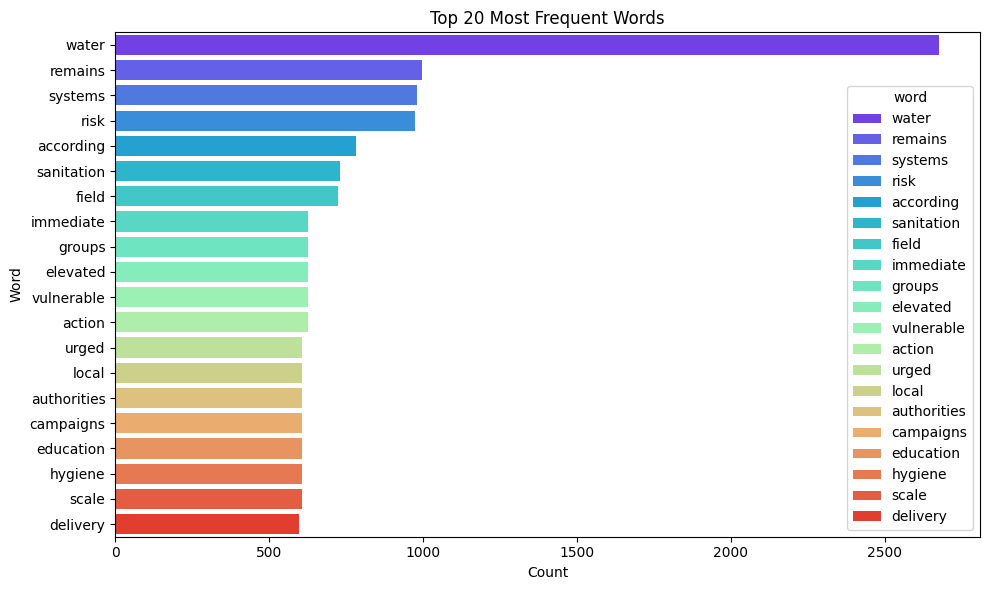

In [ ]:
# Sort and plot top Number of texts
top_n = 20

top_words = freq_df.sort_values(by='count', ascending=False).head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='count', 
    y='word', 
    data=top_words, 
    palette='rainbow', 
    hue='word', 
    legend=True 
)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

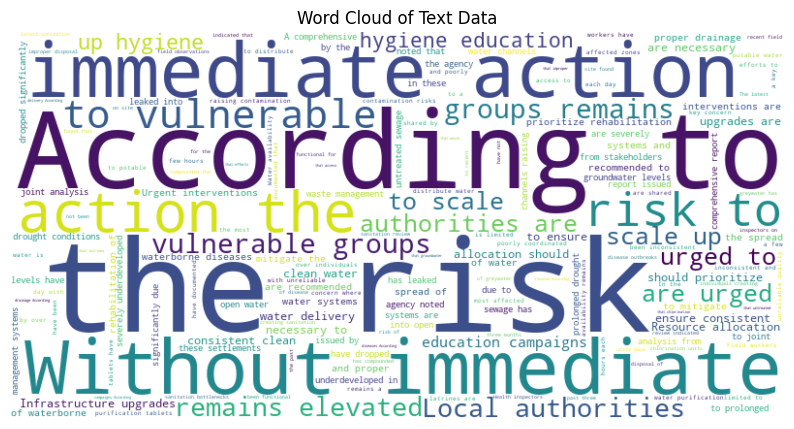

In [ ]:
from wordcloud import WordCloud

text = ' '.join(text_data.dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.reset_index(inplace=True)

In [ ]:
# Get all object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'excerpt' in categorical_cols:
    categorical_cols.remove('excerpt')


In [ ]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Columns to exclude from label encoding for separate NLP pipeline
text_columns_to_exclude = [
    'excerpt', 'source_title', 'geo_location',
    'nearby_activities', 'organization',
    'vegetation_near_source', 'waste_disposal_nearby'
]

# Select categorical columns and exclude NLP-relevant ones
categorical_cols = df.select_dtypes(include='object').drop(
    columns=text_columns_to_exclude, errors='ignore'
).columns

# Initialize label encoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [ ]:
# Text Preprocessing for 'excerpt'
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['excerpt_clean'] = df['excerpt'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt', download_dir='nltk_data')
nltk.data.path.append('nltk_data')


tokenizer = RegexpTokenizer(r'\w+')
df['excerpt_tokens'] = df['excerpt'].astype(str).apply(lambda x: tokenizer.tokenize(x.lower()))
df[['excerpt', 'excerpt_tokens']].head()


[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,excerpt,excerpt_tokens
0,Health inspectors on site found that improper ...,"[health, inspectors, on, site, found, that, im..."
1,The latest sanitation review indicated that im...,"[the, latest, sanitation, review, indicated, t..."
2,"According to recent field observations, waste ...","[according, to, recent, field, observations, w..."
3,The latest sanitation review indicated that ef...,"[the, latest, sanitation, review, indicated, t..."
4,A comprehensive report issued by the agency no...,"[a, comprehensive, report, issued, by, the, ag..."


In [ ]:
stop_words = set(stopwords.words('english'))
df['excerpt_tokens'] = df['excerpt_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df[['excerpt', 'excerpt_tokens']].head(10)


,excerpt,excerpt_tokens
0,Health inspectors on site found that improper ...,"[health, inspectors, site, found, improper, di..."
1,The latest sanitation review indicated that im...,"[latest, sanitation, review, indicated, improp..."
2,"According to recent field observations, waste ...","[according, recent, field, observations, waste..."
3,The latest sanitation review indicated that ef...,"[latest, sanitation, review, indicated, effort..."
4,A comprehensive report issued by the agency no...,"[comprehensive, report, issued, agency, noted,..."
5,The latest sanitation review indicated that un...,"[latest, sanitation, review, indicated, untrea..."
6,Water availability remains a key concern where...,"[water, availability, remains, key, concern, w..."
7,"According to recent field observations, access...","[according, recent, field, observations, acces..."
8,"According to joint analysis from stakeholders,...","[according, joint, analysis, stakeholders, acc..."
9,Field workers have documented that access to p...,"[field, workers, documented, access, potable, ..."


### **Feature Engineering**

In [ ]:
# Feature Scaling for numerical data
from sklearn.preprocessing import StandardScaler

# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# Drop columns with all NaNs or constant values (zero variance)
valid_num_cols = [col for col in num_cols 
                  if df[col].nunique(dropna=True) > 1 and df[col].notna().sum() > 0]

# Scale only valid numeric columns
scaler = StandardScaler()
df[valid_num_cols] = scaler.fit_transform(df[valid_num_cols])


In [ ]:
# Population Density Log Transform handles skewness
df['population_density'] = df['population_density'].clip(lower=0)
df['population_log'] = np.log1p(df['population_density'])

# simple binary feature
df['has_rain'] = df['recent_rain'].map({'Yes': 1, 'No': 0})
df['waste_nearby'] = df['waste_disposal_nearby'].map({'Yes': 1, 'No': 0, 'Unknown': 0})

# Interactional feature Animal access and water clarity combines the risk indicator
df['animal_clarity_interact'] = df['animal_access'] * df['water_clarity']

# Year as age of the record if static data
df['record_age'] = 2025 - df['year']

# Climate-based risk factor
df['climate_zone_encoded'] = le.fit_transform(df['climate_zone'].astype(str))


In [ ]:
# Count encoding of common categorical values and Keep only columns that don't contain lists
hashable_columns = [col for col in df.columns if df[col].map(type).ne(list).all()]

# Drop duplicates only based on those columns
df = df.drop_duplicates(subset=hashable_columns)

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('severity', axis=1)
y = df['severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Feature Selection and Text Feature Integration**
After cleaning and encoding the data, the next step is to improve model performance by selecting the most relevant features. Feature selection reduces overfitting, speeds up training, and often boosts accuracy.

**Feature Selection**

Remove low-variance features: They provide little information to the model.

Check feature correlation: Drop one of two highly correlated features (e.g., using df.corr() or heatmaps).

Use model-based importance: Models like Random Forest or XGBoost can reveal which features contribute most.

Use statistical tests: For classification, try chi2, ANOVA, or mutual information.

**Integrating Text Features**

If your dataset includes text columns:

Separate processing is recommended: Apply NLP (TF-IDF, embeddings, etc.) to text features.

Combine text-derived features with structured features using concatenation or feature union.

Ensure all numerical/categorical features are scaled or encoded before combining with text.

In [ ]:
# Select structured features (exclude 'excerpt_clean' or other text features)
structured_columns = [
    'country', 'geo_location', 'water_source', 'sanitation_type', 'sector', 
    'gender', 'age_group', 'income_level', 'infrastructure_type', 
    'population_density', 'climate_zone', 'year', 'organization', 
    'source_type', 'special_needs_group', 'water_color', 'water_clarity', 
    'water_odor', 'recent_rain', 'nearby_activities', 'nearby_infrastructure', 
    'vegetation_near_source', 'waste_disposal_nearby', 'animal_access', 
    'water_flow_rate'
]

# Create structured feature DataFrame
X_structured = df[structured_columns].copy()


In [ ]:
X_structured.info()
X_structured.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 4156
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 3000 non-null   float64
 1   geo_location            3000 non-null   float64
 2   water_source            3000 non-null   float64
 3   sanitation_type         3000 non-null   float64
 4   sector                  3000 non-null   float64
 5   gender                  3000 non-null   float64
 6   age_group               3000 non-null   float64
 7   income_level            3000 non-null   float64
 8   infrastructure_type     3000 non-null   float64
 9   population_density      3000 non-null   float64
 10  climate_zone            3000 non-null   float64
 11  year                    3000 non-null   float64
 12  organization            3000 non-null   object 
 13  source_type             3000 non-null   float64
 14  special_needs_group     3000 non-null   float

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the object columns
obj_cols = ['organization', 'nearby_activities', 'vegetation_near_source', 'waste_disposal_nearby']
le = LabelEncoder()

for col in obj_cols:
    X_structured[col] = le.fit_transform(X_structured[col])


In [ ]:
X_structured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 4156
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 3000 non-null   float64
 1   geo_location            3000 non-null   float64
 2   water_source            3000 non-null   float64
 3   sanitation_type         3000 non-null   float64
 4   sector                  3000 non-null   float64
 5   gender                  3000 non-null   float64
 6   age_group               3000 non-null   float64
 7   income_level            3000 non-null   float64
 8   infrastructure_type     3000 non-null   float64
 9   population_density      3000 non-null   float64
 10  climate_zone            3000 non-null   float64
 11  year                    3000 non-null   float64
 12  organization            3000 non-null   int64  
 13  source_type             3000 non-null   float64
 14  special_needs_group     3000 non-null   float

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text column
X_text = tfidf.fit_transform(df['excerpt_clean'])

# Convert to DataFrame and reset index
import pandas as pd

X_text_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out(), index=df.index)

In [ ]:
# Combine both feature sets

X_all = pd.concat([X_structured, X_text_df], axis=1)

# Define target
y = df['severity']


In [ ]:
# Final Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

###  **Feature Selection**

To reduce dimensionality and improve model efficiency, we performed feature selection using two methods:

- **Univariate Selection** (`SelectKBest` with Chi-Square) to retain top-scoring features.
- **Model-Based Selection** (`SelectFromModel`) using feature importances from a Random Forest classifier.

This step ensures that only the most informative features are used for modeling.


In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Get numeric features only
X_num = X_train.select_dtypes(include=['int64', 'float64'])

# Compute mutual information scores
mi_scores = mutual_info_regression(X_num, y_train)

# Create a DataFrame for easier sorting
mi_df = pd.DataFrame({'Feature': X_num.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Select features with above-median score
threshold = mi_df['MI_Score'].median()
selected_features_mi = mi_df[mi_df['MI_Score'] >= threshold]['Feature'].tolist()

print("Selected Features from Mutual Info:")
print(selected_features_mi)

Selected Features from Mutual Info:
['water_color', 'waste_disposal_nearby', 'recent_rain', 'water_odor', 'water_flow_rate', 'vegetation_near_source', 'nearby_activities', 'nearby_infrastructure', 'water_clarity', 'animal_access', 'ensure', 'mitigate', 'infrastructure', 'raising', 'analysis', 'resource', 'affected', 'special_needs_group', 'source_type', 'health', 'coordinated', 'observations', 'improper', 'consistent', 'vulnerable', 'income_level', 'systems', 'gender', 'immediate', 'upgrades', 'leaked', 'open', 'chlorination', 'year', 'concern', 'distribute', 'day', 'infrastructure_type', 'quality', 'hygiene', 'urgent', 'urged', 'shared', 'groundwater', 'workers', 'inconsistent', 'sanitation', 'hours', 'necessary', 'organization', 'severely', 'bottlenecks', 'issued', 'outbreaks', 'interventions', 'geo_location', 'sewage', 'purification', 'latrines', 'age_group', 'sector', 'country', 'water_source', 'sanitation_type', 'authorities', 'comprehensive', 'compounded', 'clean', 'channels', 'a

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

y_train_int = y_train.astype(int)

# Fit model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_int)

# Select from model
sfm = SelectFromModel(rf, threshold='median', prefit=True)
selected_features_sfm = X_train.columns[sfm.get_support()].tolist()

print("Selected Features from Random Forest:")
print(selected_features_sfm)


Selected Features from Random Forest:
['country', 'geo_location', 'water_source', 'sanitation_type', 'sector', 'gender', 'age_group', 'income_level', 'infrastructure_type', 'population_density', 'climate_zone', 'year', 'organization', 'source_type', 'special_needs_group', 'water_color', 'water_clarity', 'water_odor', 'recent_rain', 'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source', 'waste_disposal_nearby', 'animal_access', 'water_flow_rate', 'access', 'according', 'action', 'agency', 'allocation', 'analysis', 'authorities', 'bottlenecks', 'campaigns', 'day', 'disease', 'disposal', 'field', 'groups', 'hygiene', 'inspectors', 'interventions', 'joint', 'local', 'management', 'mitigate', 'potable', 'prolonged', 'proper', 'quality', 'recommended', 'remains', 'report', 'resource', 'risk', 'sanitation', 'scale', 'settlements', 'severely', 'site', 'stakeholders', 'systems', 'unreliable', 'urged', 'urgent', 'waste', 'water', 'waterborne', 'workers']


###  **Combining Feature Selection Methods**

To improve the robustness of feature selection, we combined two methods:

- **Mutual Information Regression**
- **Random Forest-based Selection**

We extracted features that were either:
- Selected by both methods (intersection), or
- Selected by at least one method (union).

This hybrid approach balances relevance and importance, ensuring we retain only the most informative features for modeling.


In [ ]:
# Combine the results
mi_set = set(selected_features_mi)
rf_set = set(selected_features_sfm)

# Features selected by both
selected_features_joint = list(mi_set.intersection(rf_set))
print("Common selected features:")
print(selected_features_joint)

selected_features_union = list(mi_set.union(rf_set))


Common selected features:
['year', 'nearby_infrastructure', 'waterborne', 'infrastructure_type', 'water_clarity', 'report', 'analysis', 'vegetation_near_source', 'waste_disposal_nearby', 'age_group', 'nearby_activities', 'special_needs_group', 'resource', 'settlements', 'gender', 'recent_rain', 'action', 'field', 'interventions', 'management', 'agency', 'water_odor', 'remains', 'water_color', 'sanitation_type', 'potable', 'authorities', 'sector', 'disease', 'proper', 'risk', 'access', 'disposal', 'recommended', 'site', 'sanitation', 'country', 'according', 'urgent', 'joint', 'workers', 'animal_access', 'geo_location', 'prolonged', 'unreliable', 'campaigns', 'income_level', 'stakeholders', 'urged', 'hygiene', 'local', 'systems', 'day', 'scale', 'mitigate', 'quality', 'water_source', 'water', 'source_type', 'organization', 'bottlenecks', 'inspectors', 'population_density', 'waste', 'groups', 'severely', 'water_flow_rate', 'climate_zone', 'allocation']


## **Modelling**

We now move into building and evaluating classification models to predict the severity of access to clean water.

**Objective:**
Use selected structured and text features to predict the `target` class indicating the severity of access to clean water.

**Models Selected:**
- Logistic Regression (baseline)
- Random Forest
- XGBoost

Each model will be trained using a `Pipeline` that includes preprocessing with `ColumnTransformer`, followed by training and evaluation.

**Evaluation Metrics:**
- Accuracy
- Classification Report (Precision, Recall, F1-Score)
- Confusion Matrix
